In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
import sys, os
sys.path.insert(0, os.path.abspath(".."))

In [18]:
with open("../data/reduced_games.pkl","rb") as f:
    games=pkl.load(f)

In [3]:
games

,app_id,title,price_final,description,tags
0,13500,Prince of Persia: Warrior Within™,9.99,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,113020,Monaco: What's Yours Is Mine,14.99,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
2,226560,Escape Dead Island,14.99,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
3,249050,Dungeon of the ENDLESS™,11.99,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
4,250180,METAL SLUG 3,7.99,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
...,...,...,...,...,...
9995,1588380,Blaster Master Zero 3,14.99,The Pinnacle of Mutant Blasting Action Is Here...,"[Action, Adventure, Metroidvania, Exploration,..."
9996,1636000,Tybot Invasion: The Typing Runner,1.99,"Type words quickly to destroy robots, move amo...","[Typing, Runner, Spelling, On-Rails Shooter, S..."
9997,1669420,Islets,19.99,Take to the sky and reunite a fragmented world...,"[Metroidvania, Adventure, Atmospheric, Platfor..."
9998,1693040,Synthwave Burnout,9.99,The lost highway awaits you to take you beyond...,"[Action, Racing, Sports, Rhythm, 3D, Colorful,..."


In [4]:
games["description"]=games["description"].apply(lambda x:x.split())
games["content"]=games["description"]+games["tags"]
games["content"]=games["content"].apply(lambda x:" ".join(x))

In [5]:
games=games[["app_id","title","content"]]

In [6]:
games["content"]=games["content"].replace({"[^A-Za-z ]+": ""},regex=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_32728\497656742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["content"]=games["content"].replace({"[^A-Za-z ]+": ""},regex=True)


In [7]:
games

,app_id,title,content
0,13500,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...
1,113020,Monaco: What's Yours Is Mine,Monaco Whats Yours Is Mine is a single player ...
2,226560,Escape Dead Island,Escape Dead Island is a SurvivalMystery advent...
3,249050,Dungeon of the ENDLESS™,Dungeon of the Endless is a RogueLike DungeonD...
4,250180,METAL SLUG 3,METAL SLUG the masterpiece in SNKs emblematic...
...,...,...,...
9995,1588380,Blaster Master Zero 3,The Pinnacle of Mutant Blasting Action Is Here...
9996,1636000,Tybot Invasion: The Typing Runner,Type words quickly to destroy robots move amon...
9997,1669420,Islets,Take to the sky and reunite a fragmented world...
9998,1693040,Synthwave Burnout,The lost highway awaits you to take you beyond...


In [8]:
from nltk.stem.snowball import EnglishStemmer
stemmer=EnglishStemmer()
def stem(text):
    y=[]
    for w in text.split():
        new_w=stemmer.stem(w)
        y.append(new_w)
    return " ".join(y)
print(stem("abilities"))

abil


In [9]:
games["content"]=games["content"].apply(stem)
games

C:\Users\HP\AppData\Local\Temp\ipykernel_32728\2413988772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["content"]=games["content"].apply(stem)


,app_id,title,content
0,13500,Prince of Persia: Warrior Within™,enter the dark underworld of princ of persia w...
1,113020,Monaco: What's Yours Is Mine,monaco what your is mine is a singl player or ...
2,226560,Escape Dead Island,escap dead island is a survivalmysteri adventu...
3,249050,Dungeon of the ENDLESS™,dungeon of the endless is a roguelik dungeonde...
4,250180,METAL SLUG 3,metal slug the masterpiec in snks emblemat d r...
...,...,...,...
9995,1588380,Blaster Master Zero 3,the pinnacl of mutant blast action is here bla...
9996,1636000,Tybot Invasion: The Typing Runner,type word quick to destroy robot move among la...
9997,1669420,Islets,take to the sky and reunit a fragment world in...
9998,1693040,Synthwave Burnout,the lost highway await you to take you beyond ...


In [11]:
tf_idf=tfidf(stop_words="english",ngram_range=(1,2),min_df=0.002,max_df=0.5)
tfidf_matrix=tf_idf.fit_transform([x for x in games["content"]])
print(tfidf_matrix.shape)

(10000, 3306)


In [12]:
feature_list=list(tf_idf.get_feature_names_out())
feature_list

['abandon',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abstract',
 'absurd',
 'abyss',
 'academi',
 'access',
 'access action',
 'access casual',
 'access horror',
 'access indi',
 'access multiplay',
 'access rpg',
 'access simul',
 'access singleplay',
 'access strategi',
 'access turnbas',
 'access vr',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accord',
 'accur',
 'achiev',
 'acquir',
 'act',
 'action',
 'action action',
 'action actionadventur',
 'action adventur',
 'action anim',
 'action arcad',
 'action atmospher',
 'action bullet',
 'action casual',
 'action classic',
 'action color',
 'action combat',
 'action comedi',
 'action coop',
 'action cute',
 'action difficult',
 'action earli',
 'action explor',
 'action fantasi',
 'action femal',
 'action fight',
 'action firstperson',
 'action fps',
 'action funni',
 'action game',
 'action gore',
 'action great',
 'action hack',
 'action horror',
 'action indi',
 'action local',
 'action multiplay',
 'action open',
 'action p

In [13]:
tfidf_pd = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix,columns=feature_list)

In [14]:
tfidf_pd

,abandon,abil,abl,aboard,abov,abstract,absurd,abyss,academi,access,...,youll need,young,young girl,young man,youv,yuri,zero,zombi,zombi surviv,zone
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.276294,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.235272,0.000000,0.0,0.0
9996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
9997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
9998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.112768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [13]:
with open("../data/tf_idf.pkl","wb") as f:
    pkl.dump(tfidf_pd,f)

In [15]:
pca=PCA()
pca.fit(tfidf_pd.to_numpy())

PCA()

In [21]:
pca.explained_variance_ratio_

array([1.65109886e-02, 1.37268829e-02, 1.12379082e-02, ...,
       3.25632425e-33, 1.20972997e-36, 9.96071959e-37])

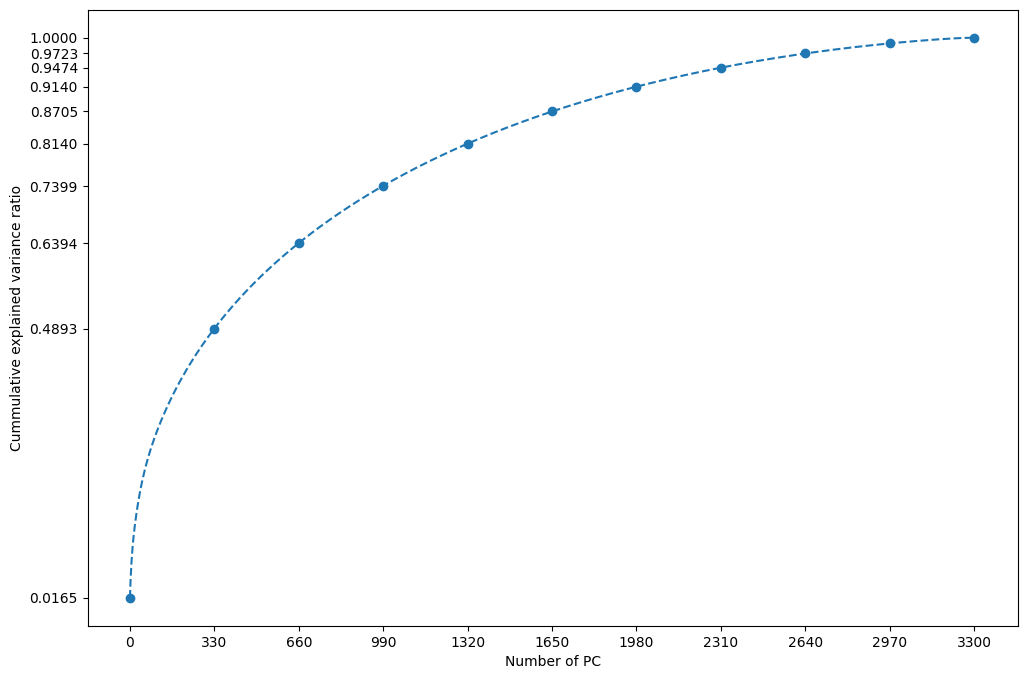

In [23]:
cum_ratio=pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(12,8))
plt.plot(range(tfidf_pd.shape[1]),cum_ratio,linestyle="--",marker='o',markevery=range(0,tfidf_pd.shape[1],tfidf_pd.shape[1]//10))
tick_labels=range(0,tfidf_pd.shape[1],tfidf_pd.shape[1]//10)
tick_values=[cum_ratio[i] for i in range(0,tfidf_pd.shape[1],tfidf_pd.shape[1]//10)]
tick_values=tick_values[:-2]
tick_values.append(1)
plt.xticks(tick_labels)
plt.yticks(tick_values)
plt.xlabel("Number of PC")
plt.ylabel("Cummulative explained variance ratio")

plt.show()

In [19]:
rec=pd.read_csv("../data/recommendations.csv",usecols=["app_id","user_id","is_recommended","hours"])

In [20]:
game_rec=games.merge(rec,on="app_id")
user_rec_count=game_rec.groupby("user_id")["app_id"].count().sort_values(ascending=False)
user_list=user_rec_count[user_rec_count>=30]
user_list_index=user_list.index.to_list()
user__count_dict=user_list.to_dict()
print(len(user_list_index))

1214


In [21]:
rec=rec[rec.user_id.isin(user_list_index)]
rec=rec[rec.app_id.isin(games["app_id"].tolist())]

In [22]:
rec.shape

(70951, 4)

In [23]:
user_rec_count=rec.groupby("user_id")["app_id"].count().sort_values(ascending=False)
user_rec_count

user_id
10610195    675
11804354    520
12955416    470
7455040     442
8857084     377
           ... 
5721612      30
6205289      30
8492884      30
12032544     30
6237689      30
Name: app_id, Length: 1214, dtype: int64

In [24]:
rec["is_recommended"]=rec["is_recommended"].map({True:1,False:0})

In [25]:
# Define rating intervals and corresponding ratings
rating_intervals = [(0.0, 2.0),(2.0,6.0) ,(6.0, 14.1), (14.1, 39.7),(39.7,float('inf'))]  # Hours intervals
ratings = [2,2.5,3,3.5,4]  # Corresponding ratings
# Function to assign ratings based on hours played
def assign_rating(hours, is_recommended):
    for i, (start, end) in enumerate(rating_intervals):
        if start <= hours < end:
            return ratings[i] + 2 * is_recommended - 1
    return ratings[-1] + 2* is_recommended - 1  # Assign highest rating for hours beyond the last interval

In [26]:
rec['rating'] = rec.apply(lambda row: assign_rating(row['hours'], row['is_recommended']), axis=1)

In [27]:
rec

,app_id,is_recommended,hours,user_id,rating
34347,678950,1,24.3,7243163,4.5
35177,1325200,1,0.5,8689190,3.0
37802,678950,1,24.4,10039294,4.5
44014,1325200,1,15.7,4768934,4.5
46986,1325200,1,162.4,12750792,5.0
...,...,...,...,...,...
4108803,239160,1,657.0,2285335,5.0
4108842,235540,0,8.0,11617429,2.0
4109049,333600,1,9.0,4802239,4.0
4109111,1818450,1,1.0,13261742,3.0


In [28]:
rec["rating"].value_counts().sort_values()

rating
2.5     1300
2.0     2460
1.5     4341
1.0     4849
5.0     4991
4.5     9810
3.0    10897
4.0    14317
3.5    17986
Name: count, dtype: int64

In [29]:
with open("../data/processed_rec2.pkl","wb") as f:
    pkl.dump(rec,f)